#### Shinkansen Travel Experience

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')


Train databases

In [ ]:
df_survey_train = pd.read_csv('/content/drive/MyDrive/A.T.I/MIT IDSS/Hackathon/Surveydata_train.csv')
df_survey_test = pd.read_csv('/content/drive/MyDrive/A.T.I/MIT IDSS/Hackathon/Surveydata_test.csv')

In [ ]:
df_survey_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
df_survey_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
print(df_survey_train.info())
print(df_survey_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [ ]:
df_survey_train.describe()

,ID,Overall_Experience
count,9.437900e+04,94379.000000
mean,9.884719e+07,0.546658
std,2.724501e+04,0.497821
min,9.880000e+07,0.000000
25%,9.882360e+07,0.000000
50%,9.884719e+07,1.000000
75%,9.887078e+07,1.000000
max,9.889438e+07,1.000000


In [ ]:
df_survey_train.isna().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
df_survey_test.isna().sum()

ID                            0
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

In [ ]:
df_survey_train.duplicated().sum()

0

In [ ]:
imputer_mode = SimpleImputer(strategy="most_frequent")
df_survey_train[["Seat_Comfort","Arrival_Time_Convenient","Catering","Platform_Location","Onboard_Wifi_Service","Onboard_Entertainment",
                 "Online_Support","Ease_of_Online_Booking","Onboard_Service","Legroom","Baggage_Handling","CheckIn_Service","Cleanliness",
                "Online_Boarding"]] = imputer_mode.fit_transform(df_survey_train[["Seat_Comfort","Arrival_Time_Convenient","Catering","Platform_Location","Onboard_Wifi_Service","Onboard_Entertainment",
                 "Online_Support","Ease_of_Online_Booking","Onboard_Service","Legroom","Baggage_Handling","CheckIn_Service","Cleanliness",
                "Online_Boarding"]])

df_survey_test[["Seat_Comfort","Arrival_Time_Convenient","Catering","Platform_Location","Onboard_Wifi_Service","Onboard_Entertainment",
                 "Online_Support","Ease_of_Online_Booking","Onboard_Service","Legroom","Baggage_Handling","CheckIn_Service","Cleanliness",
                "Online_Boarding"]] = imputer_mode.fit_transform(df_survey_test[["Seat_Comfort","Arrival_Time_Convenient","Catering","Platform_Location","Onboard_Wifi_Service","Onboard_Entertainment",
                 "Online_Support","Ease_of_Online_Booking","Onboard_Service","Legroom","Baggage_Handling","CheckIn_Service","Cleanliness",
                "Online_Boarding"]])

Test databases

In [ ]:
df_travel_train = pd.read_csv('/content/drive/MyDrive/A.T.I/MIT IDSS/Hackathon/Traveldata_train.csv')

In [ ]:
df_travel_test = pd.read_csv('/content/drive/MyDrive/A.T.I/MIT IDSS/Hackathon/Traveldata_test.csv')

In [ ]:
df_travel_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
df_travel_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [ ]:
df_travel_train.isna().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [ ]:
df_travel_test.isna().sum()

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
dtype: int64

Treatment of missing values

In [ ]:
df_travel_train[["Gender","Customer_Type","Age","Type_Travel","Departure_Delay_in_Mins","Arrival_Delay_in_Mins"]] = imputer_mode.fit_transform(
    df_travel_train[["Gender","Customer_Type","Age","Type_Travel","Departure_Delay_in_Mins","Arrival_Delay_in_Mins"]])

df_travel_test[["Gender","Customer_Type","Age","Type_Travel","Departure_Delay_in_Mins","Arrival_Delay_in_Mins"]] = imputer_mode.transform(
    df_travel_test[["Gender","Customer_Type","Age","Type_Travel","Departure_Delay_in_Mins","Arrival_Delay_in_Mins"]])

In [ ]:
df_travel_train.isna().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

In [ ]:
df_travel_test.isna().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

Merge databases

Train set

In [ ]:
# Joining/merging the count_df anf song_df to better understand the user prefrences
df_train = pd.merge(df_survey_train, df_travel_train.drop_duplicates(['ID']), on="ID", how="left")
#df = df.drop(['Unnamed: 0'],axis=1)
df_train

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,Business Travel,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,...,Good,Poor,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,...,Acceptable,Good,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,...,Good,Acceptable,Male,Loyal Customer,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,0,Needs Improvement,Ordinary,Good,Needs Improvement,Convenient,Good,Needs Improvement,Good,...,Excellent,Good,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0


In [ ]:
cat_col = () # Columns with categorical values


for i in cat_cols:
    df_train[i].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)

In [ ]:
df_train['Seat_Comfort'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Arrival_Time_Convenient'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Catering'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Onboard_Wifi_Service'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Onboard_Entertainment'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Online_Support'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Ease_of_Online_Booking'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Onboard_Service'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Legroom'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['CheckIn_Service'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Cleanliness'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Online_Boarding'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)

In [ ]:
df_train['Platform_Location'].replace(['Very Convenient', 'Needs Improvement', 'Manageable',
       'Inconvenient', 'Convenient', 'Very Inconvenient'], [5,2,3,1,4,0], inplace = True)
df_train['Seat_Class'].replace(['Green Car', 'Ordinary'], [0,1], inplace = True)
df_train['Baggage_Handling'].replace(['Needs Improvement', 'Poor', 'Excellent', 'Acceptable', 'Good', 'Extremely Poor'], [2,1,5,3,4,0], inplace = True)

df_train['Gender'].replace(['Female', 'Male'], [0,1], inplace = True)
df_train['Customer_Type'].replace(['Loyal Customer', 'Disloyal Customer'], [0,1], inplace = True)
df_train['Type_Travel'].replace(['Business Travel', 'Personal Travel'], [0,1], inplace = True)
df_train['Travel_Class'].replace(['Business', 'Eco'], [0,1], inplace = True)

In [ ]:
df_train

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,2,0,5,5,5,4,2,3,...,2,1,0,0,52.0,0,0,272,0.0,5.0
1,98800002,0,1,1,5,1,2,4,1,4,...,4,4,1,0,48.0,1,1,2200,9.0,0.0
2,98800003,1,2,0,2,2,2,2,4,5,...,5,5,0,0,43.0,0,0,1061,77.0,119.0
3,98800004,0,3,1,2,3,2,3,2,3,...,3,3,0,0,44.0,0,0,780,13.0,18.0
4,98800005,1,3,1,3,3,3,2,4,5,...,4,4,0,0,50.0,0,0,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,1,1,4,4,4,1,1,1,...,4,1,1,0,32.0,0,0,1357,83.0,125.0
94375,98894376,1,4,1,4,4,4,2,5,5,...,3,4,1,0,44.0,0,0,592,5.0,11.0
94376,98894377,1,2,0,2,2,2,4,5,4,...,4,3,1,0,63.0,0,0,2794,0.0,0.0
94377,98894378,0,2,1,4,2,4,4,2,4,...,5,4,1,0,16.0,1,1,2744,0.0,0.0


Test set

In [ ]:
# Joining/merging the count_df anf song_df to better understand the user prefrences
df_test = pd.merge(df_survey_test, df_travel_test.drop_duplicates(['ID']), on="ID", how="left")
#df = df.drop(['Unnamed: 0'],axis=1)
df_test

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,...,Excellent,Poor,Female,Loyal Customer,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,...,Excellent,Acceptable,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,...,Needs Improvement,Excellent,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,...,Excellent,Poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,...,Excellent,Excellent,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,...,Good,Acceptable,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,...,Good,Good,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
35599,99935600,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,...,Excellent,Needs Improvement,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
35600,99935601,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,...,Excellent,Good,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0


In [ ]:
df_test['Seat_Comfort'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Arrival_Time_Convenient'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Catering'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onboard_Wifi_Service'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onboard_Entertainment'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Online_Support'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Ease_of_Online_Booking'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onboard_Service'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Legroom'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['CheckIn_Service'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Cleanliness'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Online_Boarding'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor' ], [5, 4, 3, 2, 1, 0], inplace = True)

In [ ]:
df_test['Platform_Location'].replace(['Very Convenient', 'Needs Improvement', 'Manageable',
       'Inconvenient', 'Convenient', 'Very Inconvenient'], [5,2,3,1,4,0], inplace = True)
df_test['Seat_Class'].replace(['Green Car', 'Ordinary'], [0,1], inplace = True)
df_test['Baggage_Handling'].replace(['Needs Improvement', 'Poor', 'Excellent', 'Acceptable', 'Good', 'Extremely Poor'], [2,1,5,3,4,0], inplace = True)

df_test['Gender'].replace(['Female', 'Male'], [0,1], inplace = True)
df_test['Customer_Type'].replace(['Loyal Customer', 'Disloyal Customer'], [0,1], inplace = True)
df_test['Type_Travel'].replace(['Business Travel', 'Personal Travel'], [0,1], inplace = True)
df_test['Travel_Class'].replace(['Business', 'Eco'], [0,1], inplace = True)

In [ ]:
df_test

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,3,0,3,3,3,2,5,4,5,...,5,1,0,0,36.0,0,0,532,0.0,0.0
1,99900002,0,1,4,1,3,3,1,3,3,...,5,3,0,1,21.0,0,0,1425,9.0,28.0
2,99900003,5,1,5,5,5,5,5,5,2,...,2,5,1,0,60.0,0,0,2832,0.0,0.0
3,99900004,3,0,5,3,5,1,3,5,1,...,5,1,0,0,29.0,1,1,1352,0.0,0.0
4,99900005,5,1,0,5,2,5,5,5,5,...,5,5,1,1,18.0,0,0,1610,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,2,0,5,2,3,3,2,3,3,...,4,3,1,0,8.0,1,1,1334,0.0,0.0
35598,99935599,2,1,2,4,2,3,5,5,4,...,4,4,0,0,53.0,0,0,1772,0.0,0.0
35599,99935600,4,0,0,4,2,2,4,1,2,...,5,2,1,1,22.0,0,1,1180,0.0,0.0
35600,99935601,5,1,5,5,1,3,5,4,5,...,5,4,0,0,67.0,1,1,420,23.0,16.0


In [ ]:
X = df_train.drop(columns = ['ID','Overall_Experience'], axis = 1)
y = df_train['Overall_Experience']

x_test = df_test.drop(['ID'], axis = 1)

In [ ]:
#performing train-test split of (80:20) on the training data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.20, random_state=1)

display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(75503, 23)

(18876, 23)

(75503,)

(18876,)

In [ ]:
X_train

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
17535,3,0,4,3,4,5,3,1,5,1,...,3,5,1,0,35.0,1,1,1942,62.0,66.0
69574,3,0,2,3,3,4,3,4,4,4,...,3,4,1,1,16.0,0,1,1686,0.0,14.0
45312,1,1,0,1,4,2,1,2,2,4,...,4,2,1,1,28.0,0,1,1978,0.0,0.0
40906,2,0,2,2,2,4,4,4,4,4,...,4,3,0,0,54.0,0,0,460,0.0,0.0
66430,5,0,4,5,5,2,5,2,2,4,...,5,2,0,1,25.0,0,0,1495,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,4,1,4,4,4,3,4,4,5,5,...,5,4,1,0,39.0,0,0,1530,0.0,0.0
73349,3,0,3,3,3,4,4,5,4,4,...,4,5,1,0,56.0,0,0,4006,0.0,0.0
50057,5,0,5,5,5,2,4,2,5,4,...,5,4,0,0,53.0,0,1,110,0.0,0.0
5192,5,1,3,4,3,5,5,5,5,3,...,2,5,0,0,41.0,0,1,2066,75.0,73.0


Model Decision

In [ ]:
# Creating metric function to run it multiple times in a faster way
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Logistic Regression

In [ ]:
lg = LogisticRegression() # Create Logistic regression Model
lg.fit(X_train,Y_train) # Fitting model

LogisticRegression()

              precision    recall  f1-score   support

           0       0.80      0.71      0.75     34224
           1       0.78      0.86      0.82     41279

    accuracy                           0.79     75503
   macro avg       0.79      0.78      0.78     75503
weighted avg       0.79      0.79      0.79     75503



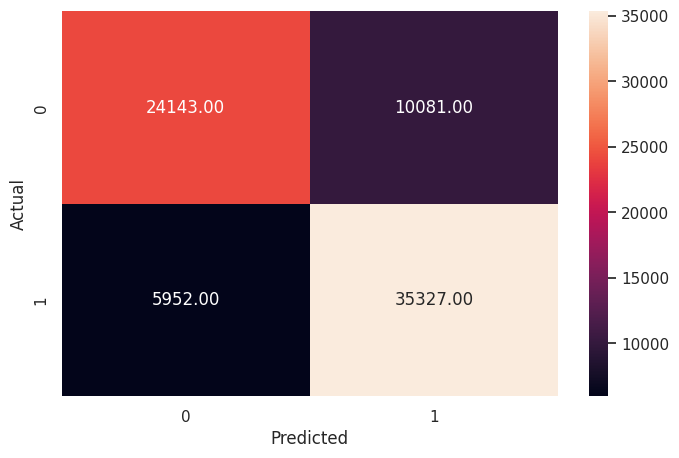

In [ ]:
y_pred_train = lg.predict(X_train)
metrics_score(Y_train, y_pred_train)

#### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=1) # Creating decision tree model
dt.fit(X_train, Y_train) # fitting model

DecisionTreeClassifier(random_state=1)

Train set


In [ ]:
pred_train_dt = dt.predict(X_train) # predict with train set
accuracy_score(Y_train, pred_train_dt)

1.0

Test set

In [ ]:
pred_test_dt = dt.predict(X_test) # predict with train set
accuracy_score(Y_test, pred_test_dt)

0.9317122271667726

#### Random forest


In [ ]:
rf = RandomForestClassifier( random_state = 1) # creating random forest model PUT CLASS WEIGHT HERE TO SEE IF IT HELPS!!!!!!!!!!!!!!!!

rf.fit(X_train, Y_train) # Fitting model

RandomForestClassifier(random_state=1)

train set

In [ ]:
pred_train_rf = rf.predict(X_train) # predict with train set
accuracy_score(Y_train, pred_train_rf)

1.0

test set

In [ ]:
pred_test_rf = rf.predict(X_test) # predict with train set
accuracy_score(Y_test, pred_test_rf)

0.9484530620894257

HyperParameter Tuning Random Forest

In [ ]:
rf_tuned = RandomForestClassifier(random_state=1) # creating tuned model

# parameters for gridsearchCV
parameters = {
    "max_depth": [10,20,30,40,50,60,70,80,90,100],
    "min_samples_leaf": [1,2,4],
    "min_samples_split": [2,5,10],
    "n_estimators": [120,200,300],
    "max_features": ['auto','sqrt']
}

grid_obj = GridSearchCV(rf_tuned, param_grid = parameters, cv=3, n_jobs=-1) # Run GridSearchCV and assign it to variable
grid_obj = grid_obj.fit(X_train, Y_train)


rf_tuned = grid_obj.best_estimator_ # set tuned model with the best estimators



rf_tuned.fit(X_train, Y_train) # Fitting tuned model

In [ ]:
pred_test_rf_tuned = rf_tuned.predict(X_test) # predict with train set
accuracy_score(Y_test, pred_test_rf_tuned)

TEST DATA

In [ ]:
df_test1 = df_test.copy()
pred = rf.predict(x_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample1.csv', index=False)